In [0]:
# Load Customers CSV
df_customers = spark.read.csv("/FileStore/tables/amazon_customers.csv", header=True, inferSchema=True)

# Load Products JSON
df_products = spark.read.json("/FileStore/tables/amazon_products.json")

# Load Transactions CSV
df_transactions = spark.read.csv("/FileStore/tables/amazon_transactions.csv", header=True, inferSchema=True)

# Show first few rows
df_customers.show(5)
df_products.show(5)
df_transactions.show(5)


+-----------+---------------+----------------+-------------+-------+------------+
|customer_id|           name|            city|        state|country|prime_member|
+-----------+---------------+----------------+-------------+-------+------------+
|          1|   Allison Hill|East Theresatown|   New Mexico|    USA|          No|
|          2|    Noah Rhodes|   East Coryside|  Mississippi|    USA|          No|
|          3|Angie Henderson| North Loganfort|  Mississippi|    USA|          No|
|          4|  Daniel Wagner|     Timothyfurt|Massachusetts|    USA|          No|
|          5|Cristian Santos|  South Chadstad|        Idaho|    USA|         Yes|
+-----------+---------------+----------------+-------------+-------+------------+
only showing top 5 rows

+-------+--------------+------+----------+---------------+
|  brand|      category| price|product_id|   product_name|
+-------+--------------+------+----------+---------------+
|Brand C|        Beauty|458.44|         1|      Well Item|
|

In [0]:
# Save as Staging Tables
df_customers.write.mode("overwrite").saveAsTable("staging_customers")
df_products.write.mode("overwrite").saveAsTable("staging_products")
df_transactions.write.mode("overwrite").saveAsTable("staging_transactions")


In [0]:
# Create Dim_Customer Table
df_customers.selectExpr(
    "customer_id",
    "name",
    "city",
    "state",
    "country",
    "prime_member AS membership_status"
).write.mode("overwrite").saveAsTable("dim_customer")

# Create Dim_Product Table
df_products.selectExpr(
    "product_id",
    "product_name",
    "category",
    "brand",
    "price"
).write.mode("overwrite").saveAsTable("dim_product")

# Create Fact_Transactions Table
df_transactions.write.mode("overwrite").saveAsTable("fact_transactions")


In [0]:
%sql
SELECT 
    p.product_name, 
    SUM(t.total_price) AS total_revenue
FROM fact_transactions t
JOIN dim_product p ON t.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC;


product_name,total_revenue
Choice Tool,78989.54999999999
Message Gadget,73341.93
Matter Device,72665.24999999999
Sure Gadget,71733.8
Stuff Item,69597.07
Example Device,67543.13
Front Device,67131.17
Successful Accessory,65861.62
Half Item,65235.18
Last Tool,62638.16999999999


In [0]:
%sql
SELECT 
    c.membership_status, 
    COUNT(t.transaction_id) AS total_orders, 
    SUM(t.total_price) AS revenue
FROM fact_transactions t
JOIN dim_customer c ON t.customer_id = c.customer_id
GROUP BY c.membership_status;


membership_status,total_orders,revenue
No,139921,8.772841550000009E7
Yes,60079,3.768258823000016E7


In [0]:
spark.sql("SHOW TABLES").show()


+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
| default|amazon_customers_...|      false|
| default|amazon_products_2...|      false|
| default|amazon_transactio...|      false|
| default|        dim_customer|      false|
| default|         dim_product|      false|
| default|   fact_transactions|      false|
| default|   staging_customers|      false|
| default|    staging_products|      false|
| default|staging_transactions|      false|
+--------+--------------------+-----------+



In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("AmazonDataAnalysis").getOrCreate()

# Load Data
customers_df = spark.read.csv("/FileStore/tables/amazon_customers.csv", header=True, inferSchema=True)
products_df = spark.read.json("/FileStore/tables/amazon_products.json")
transactions_df = spark.read.csv("/FileStore/tables/amazon_transactions.csv", header=True, inferSchema=True)

# Register as Temp Views for SQL Queries
customers_df.createOrReplaceTempView("amazon_customers")
products_df.createOrReplaceTempView("amazon_products")
transactions_df.createOrReplaceTempView("amazon_transactions")





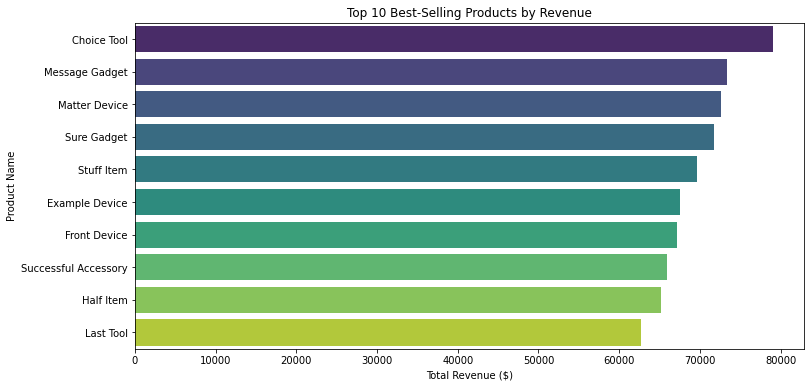

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run SQL Query
top_products_df = spark.sql("""
    SELECT 
        p.product_name, 
        SUM(t.total_price) AS total_revenue
    FROM amazon_transactions t
    JOIN amazon_products p ON t.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_revenue DESC
    LIMIT 10
""").toPandas()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_df, x="total_revenue", y="product_name", palette="viridis")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products by Revenue")
plt.show()


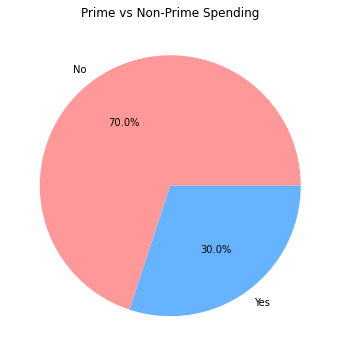

In [0]:
# Run SQL Query
prime_spending_df = spark.sql("""
    SELECT 
        prime_member, 
        SUM(total_price) AS total_spent
    FROM amazon_transactions t
    JOIN amazon_customers c ON t.customer_id = c.customer_id
    GROUP BY prime_member
""").toPandas()

# Visualization
plt.figure(figsize=(6, 6))
plt.pie(prime_spending_df["total_spent"], labels=prime_spending_df["prime_member"], autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Prime vs Non-Prime Spending")
plt.show()


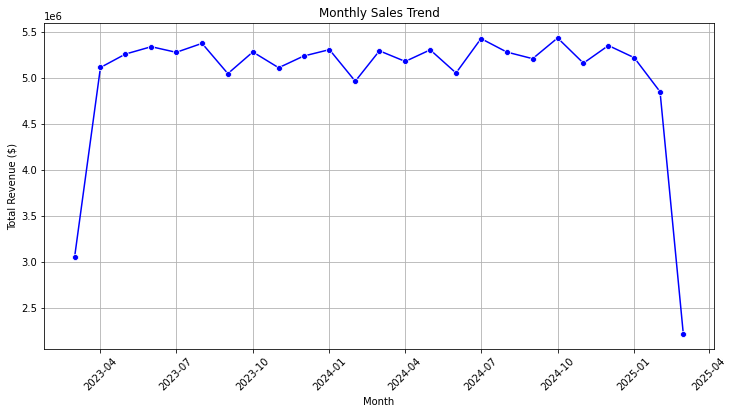

In [0]:
# Run SQL Query
monthly_sales_df = spark.sql("""
    SELECT 
        DATE_FORMAT(transaction_date, 'yyyy-MM') AS sales_month, 
        SUM(total_price) AS total_revenue
    FROM amazon_transactions
    GROUP BY sales_month
    ORDER BY sales_month
""").toPandas()

# Convert sales_month to datetime format
monthly_sales_df["sales_month"] = pd.to_datetime(monthly_sales_df["sales_month"])

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_df, x="sales_month", y="total_revenue", marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()
